In [1]:
import xarray

You can use xarray to open a single file or OPENDAP link

In [5]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/ua6/authoritative/CMIP5/CSIRO-BOM/ACCESS1-0/amip/day/atmos/day/r1i1p1/latest/ua/ua_day_ACCESS1-0_amip_r1i1p1_19790101-19831231.nc'
data = xarray.open_dataset(url)
data

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, plev: 8, time: 1826)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
  * plev       (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 ...
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 -84.38 -83.12 ...
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 ...
  * bnds       (bnds) int64 0 1
Data variables:
    time_bnds  (time, bnds) float64 ...
    plev_bnds  (plev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ua         (time, plev, lat, lon) float64 ...
Attributes:
    institution: CSIRO (Commonwealth Scientific and Industrial Research Organisation, Australia), and BOM (Bureau of Meteorology, Australia)
    institute_id: CSIRO-BOM
    experiment_id: amip
    source: ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1.875 degrees EW x approx 1.25 degree NS, 38 levels); ocean: NOA

Or combine multiple files (say a time series)

In [4]:
from siphon.catalog import TDSCatalog
url = 'http://dapds00.nci.org.au/thredds/catalog/ua6/authoritative/CMIP5/CSIRO-BOM/ACCESS1-0/amip/day/atmos/day/r1i1p1/latest/ua/catalog.xml'
cat = TDSCatalog(url)
xarray.open_mfdataset([x.access_urls['OPENDAP'] for x in cat.datasets.values()])

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, plev: 8, time: 10958)
Coordinates:
  * plev       (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 ...
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 -84.38 -83.12 ...
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 ...
  * bnds       (bnds) int64 0 1
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
Data variables:
    lon_bnds   (time, lon, bnds) float64 0.0 1.875 1.875 3.75 3.75 5.625 ...
    lat_bnds   (time, lat, bnds) float64 -90.0 -88.75 -88.75 -87.5 -87.5 ...
    plev_bnds  (time, plev, bnds) float64 1.075e+05 9.25e+04 9.25e+04 ...
    ua         (time, plev, lat, lon) float64 nan nan nan nan nan nan nan ...
    time_bnds  (time, bnds) float64 7.224e+05 7.224e+05 7.224e+05 7.225e+05 ...

Xarray doesn't load the whole file, instead it just reads the NetCDF metadata (If using OPENDAP it may take the server a little while to load the file though)

Let's go back to the single-file dataset for now

In [7]:
data?

Variables can be accessed through the `variables` attribute, or just by treating the dataset as a dict

In [10]:
list(data.variables.keys())

['time',
 'time_bnds',
 'plev',
 'plev_bnds',
 'lat',
 'lat_bnds',
 'lon',
 'lon_bnds',
 'ua',
 'bnds']

In [12]:
ua = data['ua']
ua

<xarray.DataArray 'ua' (time: 1826, plev: 8, lat: 144, lon: 192)>
[403881984 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 -84.38 -83.12 -81.88 ...
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 14.06 ...
Attributes:
    standard_name: eastward_wind
    long_name: Eastward Wind
    units: m s-1
    cell_methods: time: mean
    history: 2012-05-23T13:18:14Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20). 2012-05-23T13:18:15Z altered by CMOR: Inverted axis: plev.
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-0_amip_r0i0p0.nc

Co-ordinates are a property both of the whole file and an individual variable

In [13]:
ua.coords

Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 -84.38 -83.12 -81.88 ...
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 14.06 ...

You can treat a variable like a numpy array

In [14]:
ua[0,0,1:3,1:3]

<xarray.DataArray 'ua' (lat: 2, lon: 2)>
array([[ nan,  nan],
       [ nan,  nan]])
Coordinates:
    time     datetime64[ns] 1979-01-01T12:00:00
    plev     float64 1e+05
  * lat      (lat) float64 -88.12 -86.88
  * lon      (lon) float64 2.812 4.688
Attributes:
    standard_name: eastward_wind
    long_name: Eastward Wind
    units: m s-1
    cell_methods: time: mean
    history: 2012-05-23T13:18:14Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20). 2012-05-23T13:18:15Z altered by CMOR: Inverted axis: plev.
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-0_amip_r0i0p0.nc

In [15]:
ua[1,1,:,:].mean()

<xarray.DataArray 'ua' ()>
array(1.0716806183287637)
Coordinates:
    time     datetime64[ns] 1979-01-02T12:00:00
    plev     float64 8.5e+04

You can also see metadata at file, variable or co-ordinate level

In [18]:
data.attrs

OrderedDict([('institution',
              'CSIRO (Commonwealth Scientific and Industrial Research Organisation, Australia), and BOM (Bureau of Meteorology, Australia)'),
             ('institute_id', 'CSIRO-BOM'),
             ('experiment_id', 'amip'),
             ('source',
              'ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1.875 degrees EW x approx 1.25 degree NS, 38 levels); ocean: NOAA/GFDL MOM4p1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S, 50 levels); sea ice: CICE4.1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S); land: MOSES2 (1.875 degree EW x 1.25 degree NS, 4 levels'),
             ('model_id', 'ACCESS1-0'),
             ('forcing',
              'GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4, CFC11, CFC12, CFC113, HCFC22, HFC125, HFC134a)')

In [19]:
ua.attrs

OrderedDict([('standard_name', 'eastward_wind'),
             ('long_name', 'Eastward Wind'),
             ('units', 'm s-1'),
             ('cell_methods', 'time: mean'),
             ('history',
              '2012-05-23T13:18:14Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20). 2012-05-23T13:18:15Z altered by CMOR: Inverted axis: plev.'),
             ('associated_files',
              'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-0_amip_r0i0p0.nc')])

You can use the `plot()` function on xarray data to create a quick plot

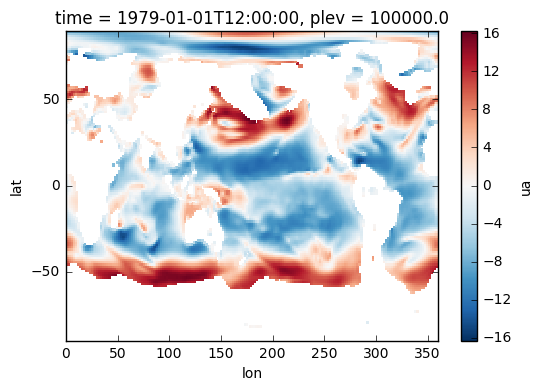

In [23]:
%matplotlib inline
ua[0,0,:,:].plot()